<img src="./airbnb.png">
<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 5em;">Madrid Data Exploring</span>
</div>

<br />
<div style="text-align: left;">
    <span style="color:#8585BB; font-family: 'Courier New'; font-size: 1.5em;">En las siguientes líneas de código estaremos haciendo una exploración de los datos obtenidos de www.insideairbnb.com para la ciudad de Madrid.</span>
</div>

In [1]:
import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np                    
import seaborn as sns
import re
from seaborn.linearmodels import corrplot
from IPython.display import HTML
from collections import Counter
import folium
import matplotlib
from matplotlib.colors import ListedColormap
import ipywidgets as widgets



%matplotlib inline 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

('Python version: ', '2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]')
('Pandas version: ', u'0.18.1')
('Today: ', datetime.date(2017, 7, 14))


In [2]:
listing = pd.read_csv('./listing_clean.csv', sep=',', index_col='Unnamed: 0')
listing.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
9135,1690312,Apartamento 200m2 para 5/6 personas,8815003,Maite,2013-09-13,False,2.0,2.0,"['email', 'phone', 'reviews', 'jumio']",True,True,Chamartin,28016,40.456181,-3.676956,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",200.0,NaN,NaN,$500.00,NaN,1,50.0,2,7,2 weeks ago,30,60,90,365,1,2015-05-24,2015-05-24,80.0,8.0,10.0,10.0,8.0,10.0,8.0,True,False,flexible,False,False,2,0.04
441,4678105,Central sunny apartment with views,17705919,Barbara Y Javi,2014-07-06,False,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",True,True,Centro,28005,40.412441,-3.711110,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",100.0,NaN,NaN,$150.00,10.0,1,0.0,2,1125,2 weeks ago,0,6,36,311,20,2015-02-01,2016-10-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,True,False,flexible,False,False,1,0.75
5021,13091807,long rental study old town madrid 2,21137168,Ale,2014-09-09,False,4.0,4.0,"['email', 'phone', 'reviews']",True,False,Centro,28004,40.426694,-3.707727,Apartment,Private room,2,1.0,2.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air conditionin...",39.0,NaN,NaN,NaN,NaN,1,0.0,7,365,today,7,9,29,281,2,2017-03-07,2017-03-20,80.0,10.0,9.0,10.0,9.0,10.0,10.0,True,True,strict,False,False,4,1.82
12574,17763677,Preciosa casa con tres suite junto metro y aut...,121238993,German,2017-03-17,False,1.0,1.0,"['email', 'phone']",True,False,Ciudad Lineal,28017,40.428646,-3.634431,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",120.0,NaN,NaN,$100.00,25.0,1,0.0,2,1125,3 weeks ago,20,47,77,168,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,strict,False,False,1,NaN
2928,13205670,Acogedora buhardilla,31194295,Veronica,2015-04-14,False,1.0,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",True,True,Centro,28012,40.410631,-3.699614,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",60.0,NaN,NaN,$100.00,NaN,1,10.0,2,1125,yesterday,15,45,75,350,13,2016-05-29,2017-03-06,83.0,9.0,9.0,10.0,10.0,10.0,9.0,True,False,strict,False,False,1,1.24


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Contruimos un Cmap que usaremos en el transcurso del notebook
</span>
</div>

In [3]:
colors = ['#007D8C', '#6BB7B9', '#79CCCD', '#FFF6E6', '#F16664']
#'#FF7476','#FF9091','#FFA6A7','#FFB8B9','#FFC6C7','#FFD1D2','#FFDADB','#FFE1E2','#FFE7E8','#FFECED'
#FEDCDD, rgb(254,220,221) #FFBABB, rgb(255,186,187) #BF8B8C, rgb(191,139,140) #BF5758, rgb(191,87,88) #7F3A3B, rgb(127,58,59) #5F2B2C, rgb(95,43,44)

my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

colors2 = ['#FEDCDD', '#FFBABB', '#BF8B8C', '#BF5758', '#7F3A3B', '#5F2B2C']

matrix_cmap = ListedColormap(sns.color_palette(colors2).as_hex())

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Sampling</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Al igual que en la parte de Limpieza de datos, me gusta trabajar con datos aleatorios...<br><br></span>
</div>

In [4]:
#Shuffle de las filas de "listing" para que obtengamos una muestra distribuida cuando mostramos el head()

listing = listing.reindex(np.random.permutation(listing.index))
listing.head(3)

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
504,844856,BEST CENTER LOCATED IN MADRID,4410687,Luis Manuel,2012-12-15,False,1.0,1.0,"['email', 'phone', 'reviews']",True,False,Centro,28013,40.417070,-3.708815,Apartment,Entire home/apt,5,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",62.0,400.0,1600.0,NaN,30.0,3,10.0,1125,1125,yesterday,0,0,0,0,2,2016-08-10,2016-08-19,100.0,8.0,6.0,10.0,10.0,10.0,8.0,True,False,strict,False,False,1,0.25
9624,4693891,PASEO de la CASTELLANA EXCELLENT,8879142,Ana,2013-09-16,False,6.0,6.0,"['email', 'phone', 'reviews', 'manual_offline']",True,True,Tetuan,28029,40.468373,-3.689958,Apartment,Private room,2,2.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair a...",32.0,168.0,598.0,NaN,NaN,1,15.0,1,90,3 months ago,0,2,32,307,39,2014-12-03,2016-12-27,85.0,9.0,9.0,9.0,9.0,9.0,9.0,True,False,moderate,False,False,6,1.36
5711,14063097,Habitación individual/cama doble/ventana interior,84316058,Mara,2016-07-17,False,5.0,5.0,"['email', 'phone', 'reviews']",True,False,Centro,28004,40.423427,-3.703112,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",42.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,2 weeks ago,0,1,18,19,1,2016-10-25,2016-10-25,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,strict,False,False,5,0.18


In [5]:
listing['amenities'][55]

'{TV,"Wireless Internet","Air conditioning",Kitchen,"Smoking allowed","Elevator in building","Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}'

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Tipos de habitaciones</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Es importante conocer las diferencias entre el precio según el tipo de habitación. Vamos a agrupar los datos según la columna room_type y veremos algunos gráficos.</span>
</div>

In [6]:
roomtype=listing.groupby('room_type').id.count()
print roomtype


room_type
Entire home/apt    7901
Private room       5187
Shared room         193
Name: id, dtype: int64


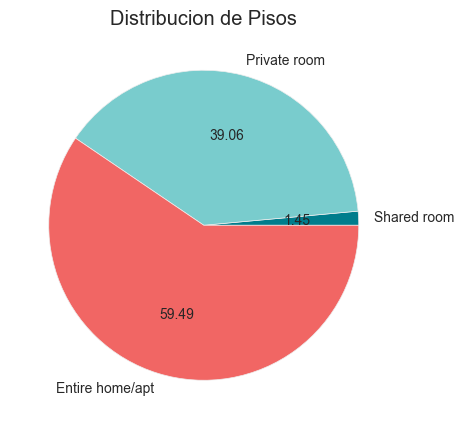

In [7]:
matplotlib.style.use('ggplot')

room = listing.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', colormap = my_cmap, figsize=(5,5), fontsize = 10, autopct = '%.2f',legend = False,
                 title = 'Distribucion de Pisos')
plt.ylabel('')


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Tipos de propiedad</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
En AirBnB se ofrece múltiples variedades de tipos de propiedades; desde opciones regulares como un piso tipo estudio hasta un Búngaloo, un Iglú o una casa en un árbol. Revisamos qué tipo de propiedades hay en Madrid como opción.
</span>
</div>

In [8]:
propertytype = listing.groupby('property_type').id.count()
propertytype

property_type
Apartment             10934
Bed & Breakfast         339
Boat                      1
Boutique hotel            6
Bungalow                  1
Camper/RV                 2
Casa particular           3
Chalet                   23
Condominium             343
Dorm                     44
Earth House               3
Guest suite               3
Guesthouse               39
Hostel                   16
House                   995
Loft                    283
Other                   218
Serviced apartment       13
Tent                      1
Timeshare                 1
Townhouse                 9
Villa                     4
Name: id, dtype: int64

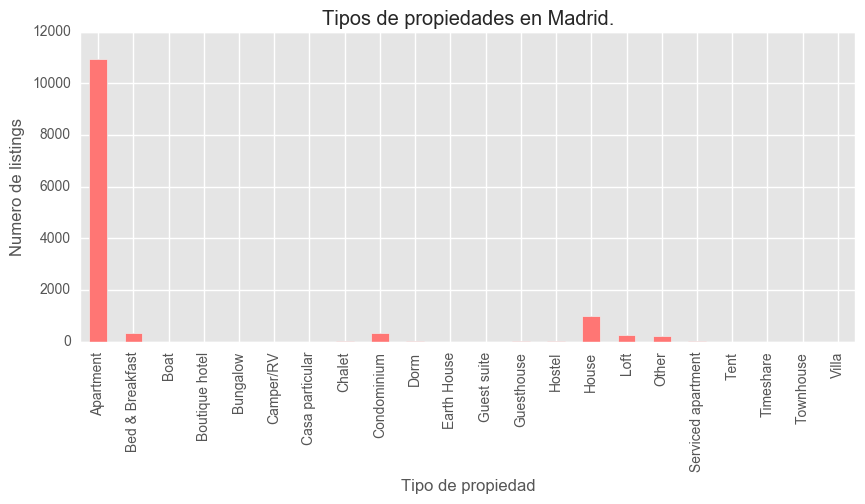

In [9]:
propertytype = listing.groupby('property_type').id.count()
propertytype = propertytype.reset_index()
propertytype = propertytype.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype['property_type']
y_pos = propertytype['Number_Of_Listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#FF7674', 
           figsize =(10,4), 
           title = 'Tipos de propiedades en Madrid.', 
           legend = False)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Numero de listings')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Agrupando un poco la gráfica anterior
</span>
</div>

In [10]:
ptype = ['Bed & Breakfast','Boat','Boutique hotel','Bungalow','Camper/RV','Chalet', 'Dorm', 'Earth House', 'Guest suite', 
         'Guesthouse', 'Hostel','Serviced apartment','Tent', 'Timeshare', 'Townhouse', 'Villa', '']
listing2 = listing

for i in range(0, len(ptype)-1):
    listing2.loc[(listing2.property_type == ptype[i]), ['property_type']] = 'Other'
    

listing2.loc[(listing2.property_type == 'Casa particular' ), ['property_type']] = 'House'


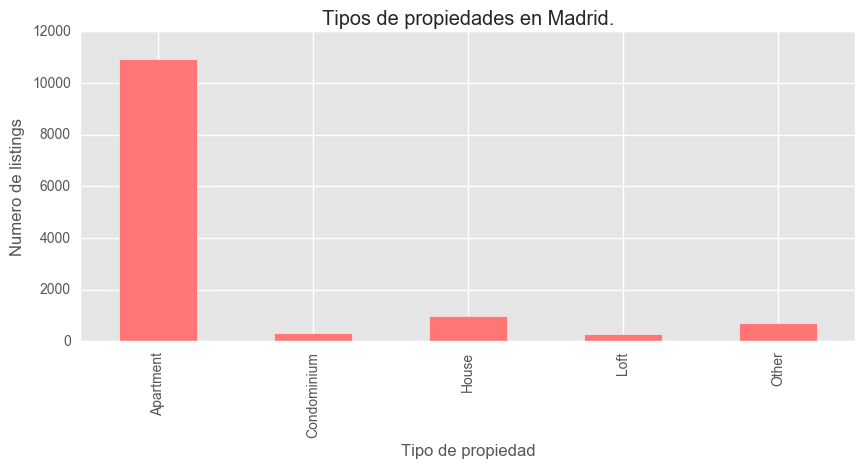

In [11]:
propertytype = listing2.groupby('property_type').id.count()
propertytype = propertytype.reset_index()
propertytype = propertytype.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype['property_type']
y_pos = propertytype['Number_Of_Listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#FF7674', 
           figsize =(10,4), 
           title = 'Tipos de propiedades en Madrid.', 
           legend = False)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Numero de listings')

In [12]:
# Analizando los precios para diferentes tipos de habitación y tipos de propiedad
roomProperty = listing.groupby(['property_type','room_type']).price.mean()
roomProperty = roomProperty.reset_index()
roomProperty = roomProperty.sort_values('price',ascending=[0])
roomProperty

,property_type,room_type,price
6,House,Entire home/apt,103.987616
12,Other,Entire home/apt,89.886525
0,Apartment,Entire home/apt,87.174143
3,Condominium,Entire home/apt,84.914439
9,Loft,Entire home/apt,77.476000
7,House,Private room,48.881997
10,Loft,Private room,43.032258
13,Other,Private room,40.362101
1,Apartment,Private room,36.621395
4,Condominium,Private room,35.648649


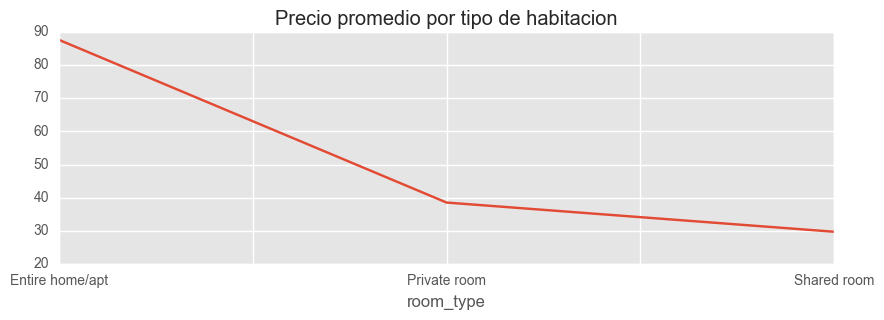

In [13]:
area = listing.groupby('room_type')
room_price = area['price'].agg([np.sum, np.mean, np.std])
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
fig.set_size_inches(10, 3)
room_price['mean'].plot(title="Precio promedio por tipo de habitacion")

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Huéspedes y alojamientos</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Veremos cómo se distribuyen los pisos en relación a la cantidad de huéspedes y otras características
</span>
</div>

In [14]:
np.unique(listing['accommodates'])
for i in range(1, 17):
    print 'Huéspedes {}:'.format(i), len(listing[listing['accommodates'] == i])

Huéspedes 1: 1942
Huéspedes 2: 4771
Huéspedes 3: 1308
Huéspedes 4: 2976
Huéspedes 5: 639
Huéspedes 6: 1012
Huéspedes 7: 161
Huéspedes 8: 238
Huéspedes 9: 48
Huéspedes 10: 89
Huéspedes 11: 16
Huéspedes 12: 37
Huéspedes 13: 3
Huéspedes 14: 10
Huéspedes 15: 1
Huéspedes 16: 30


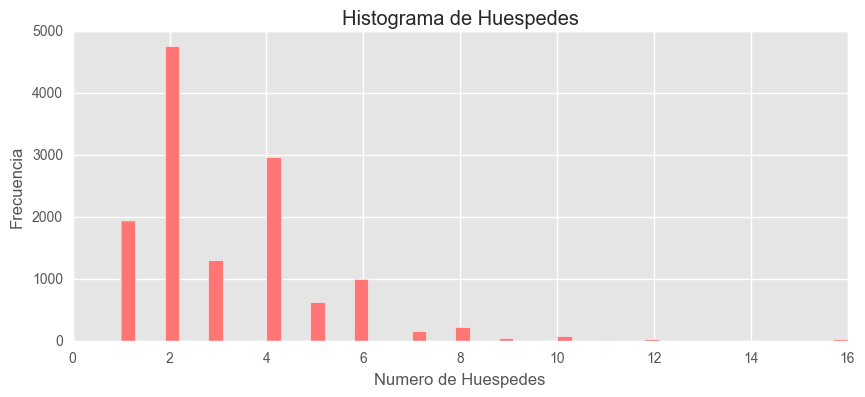

In [15]:
plt.figure(figsize=(10,4))
plt.hist(listing['accommodates'], bins=50, color = '#FF7674')
plt.title("Histograma de Huespedes")
plt.xlabel("Numero de Huespedes")
plt.ylabel("Frecuencia")
plt.show()

In [16]:
np.unique(listing['beds'])
for i in range(1, 17):
    print 'Cantidad de camas {}:'.format(i), len(listing[listing['beds'] == i])

Cantidad de camas 1: 6646
Cantidad de camas 2: 3583
Cantidad de camas 3: 1481
Cantidad de camas 4: 804
Cantidad de camas 5: 311
Cantidad de camas 6: 175
Cantidad de camas 7: 67
Cantidad de camas 8: 62
Cantidad de camas 9: 28
Cantidad de camas 10: 39
Cantidad de camas 11: 5
Cantidad de camas 12: 9
Cantidad de camas 13: 3
Cantidad de camas 14: 4
Cantidad de camas 15: 2
Cantidad de camas 16: 14


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Lo que vemos es que la mayor frecuencia de pisos son los que tienen capacidad para 2 y 4 personas y que por lo general en 1 cama duermes 2 personas. 
</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Distribución de calificaciones</span>
</div>

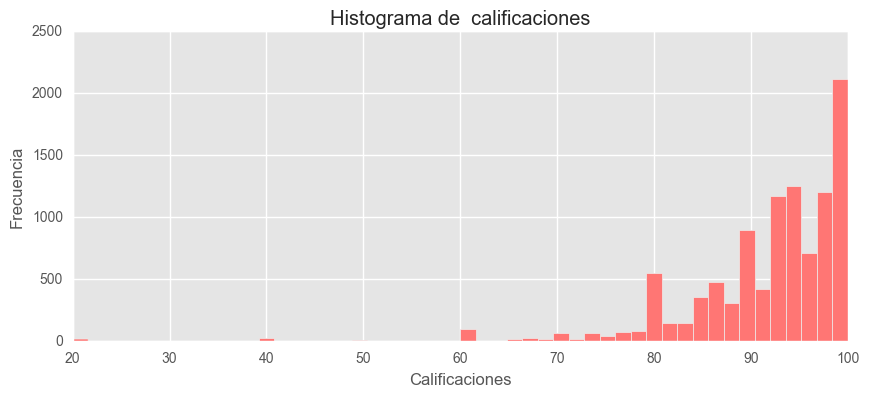

In [17]:
plt.figure(figsize=(10,4))
plt.hist(listing['review_scores_rating'][~listing['review_scores_rating'].isnull()], color = '#FF7674', bins=50)
plt.title("Histograma de  calificaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Matriz de correlación entre todas las variables</span>
</div>

C:\Users\ronny\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\ronny\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


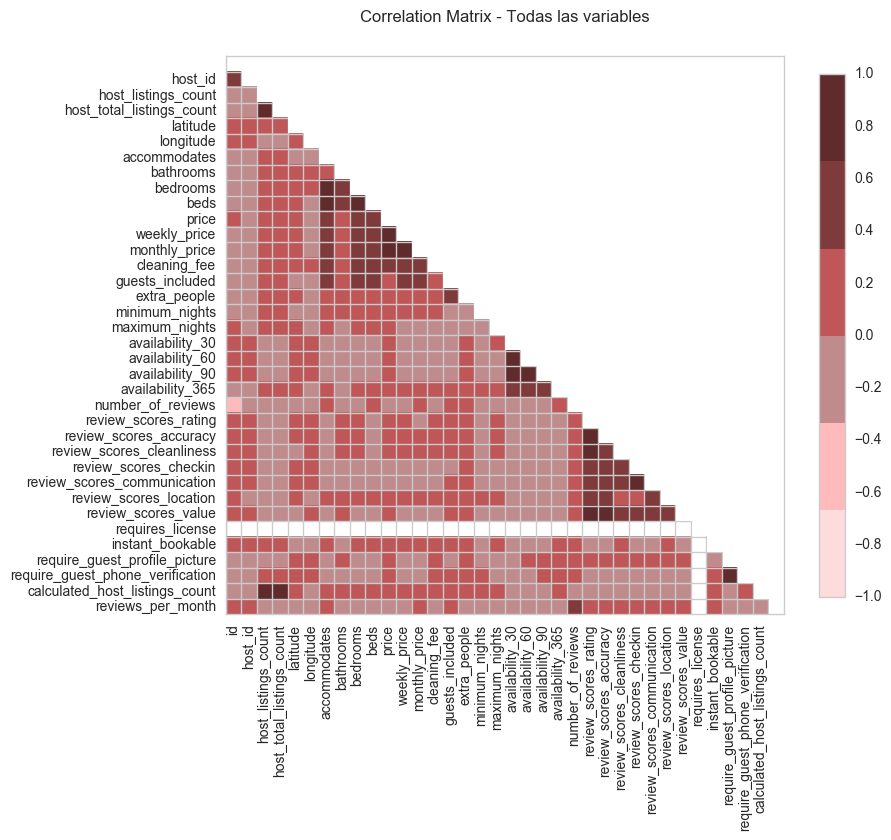

In [18]:
sns.set(style="whitegrid")
cmap = sns.diverging_palette(128, 240, as_cmap=True)
f, ax = plt.subplots(figsize=(9, 9))
corrplot(listing, annot=False, sig_stars=False, diag_names=False, ax=ax, cmap=matrix_cmap)
plt.title('Correlation Matrix - Todas las variables')
plt.show()

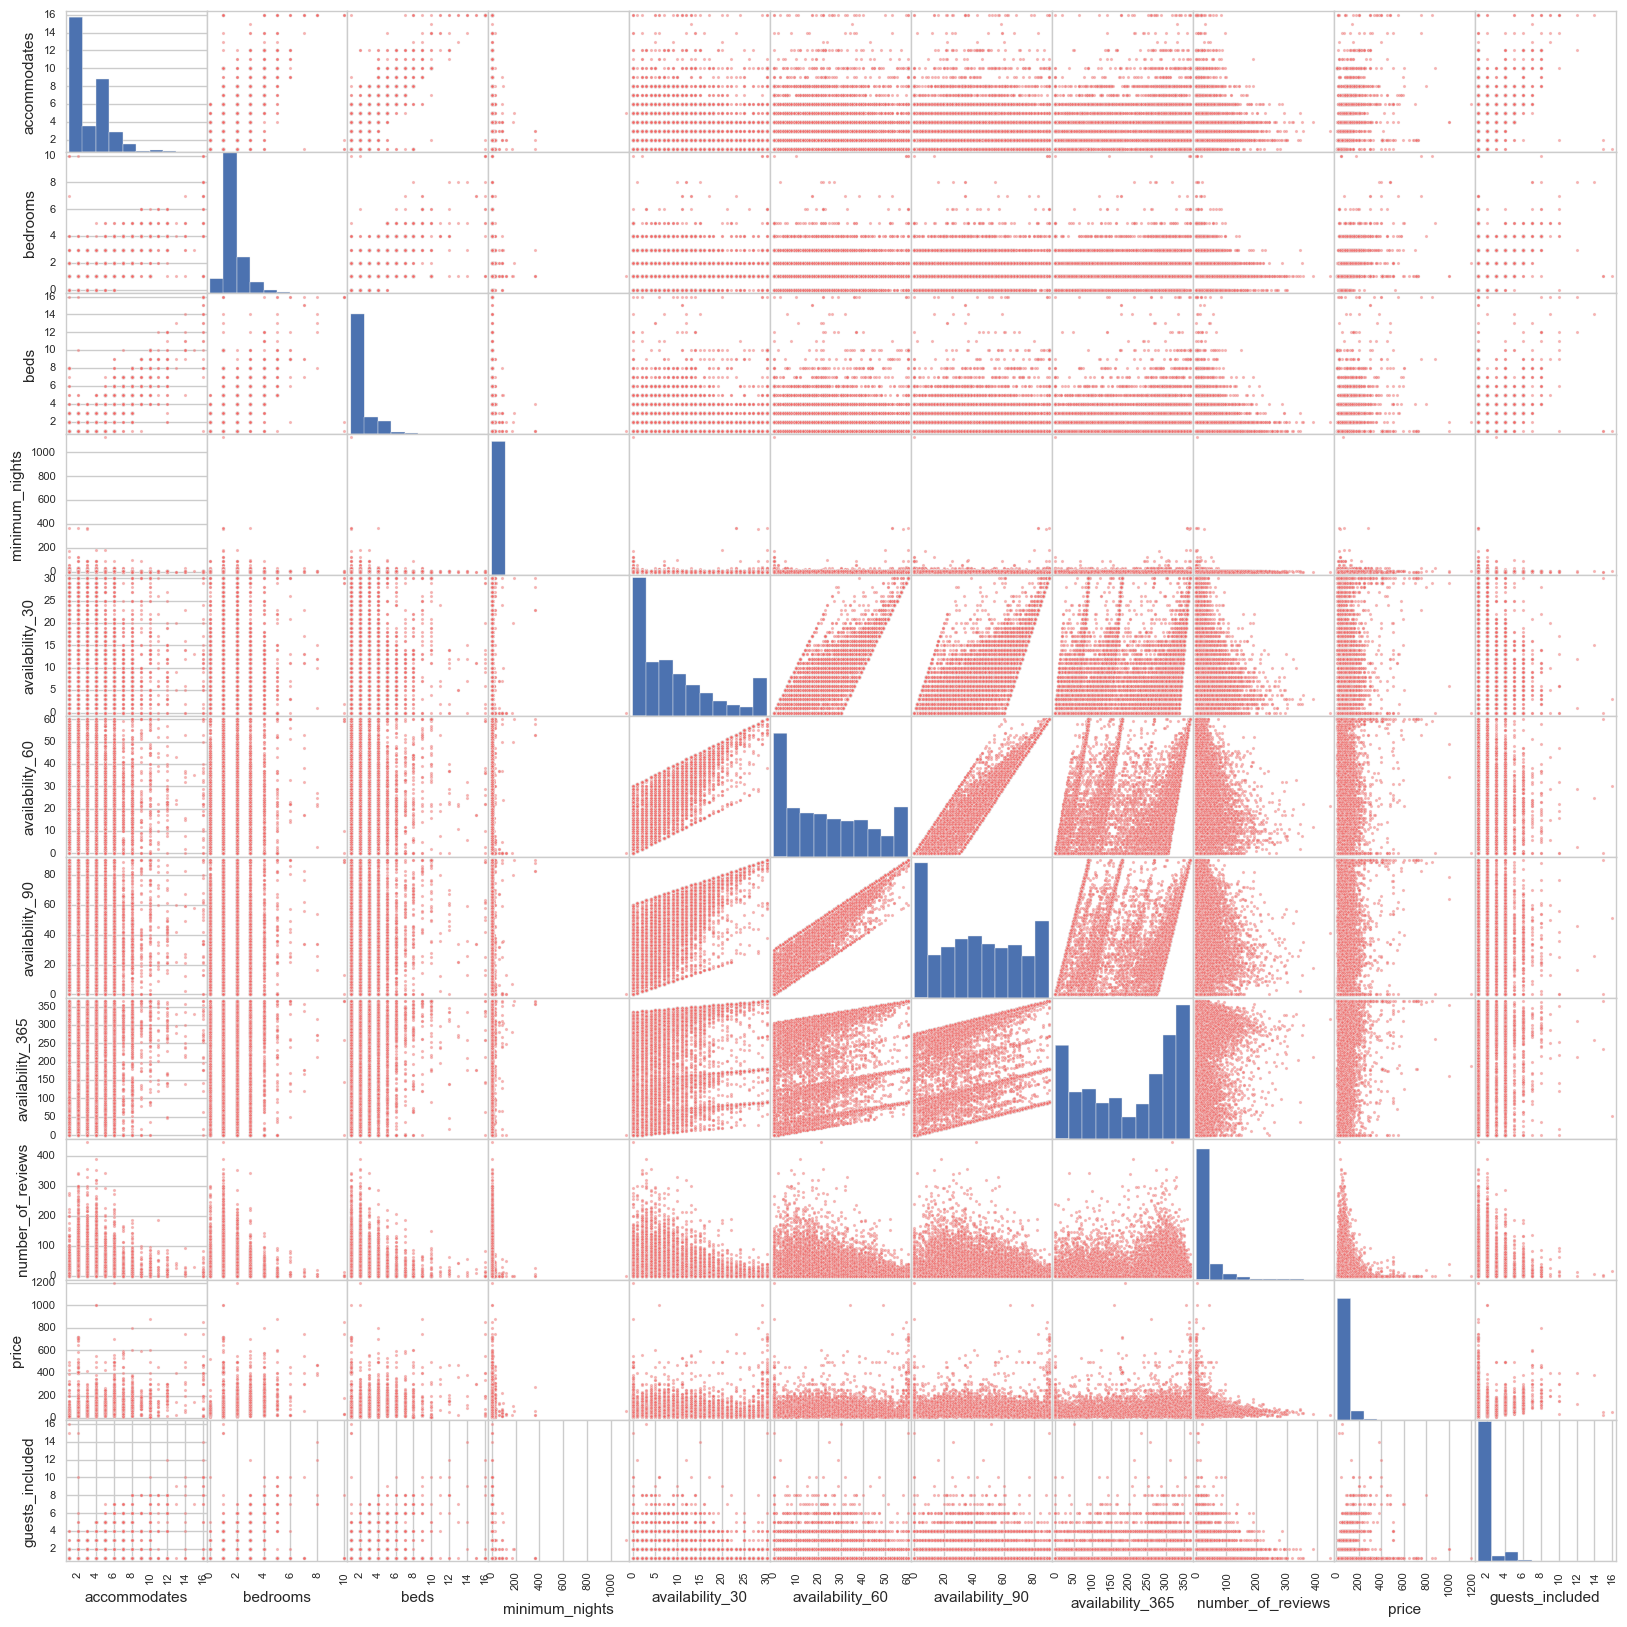

In [19]:
# Verificamos colinealidad y relaciones
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'price', 'guests_included']
axs = pd.scatter_matrix(listing[matrix_cols], figsize=(20, 20), c='#F16664')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Basados en la respuesta de la matriz anterior, no parece haber problemas evidentes entre los features. Vemos que existe cierta relación entre accommodates, bedrooms, beds y guests_included. Tiene lógica: a más camas, más huéspedes pueden alojarse. Vemos que a pesar de que hay relación, esta no se parece a una línea recta que puede ser resultado de la distribución de la propiedad, los arreglos dentro del mismo piso (una o varias camas en una habitación), etc. Por lo tanto, no hay una fuerte evidencia de colinealidad entre los features. <br><br></span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Algunas correlaciones específicas</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Ahora haremos un análisis para verificar qué correlación existe, por ejemplo, entre las camas (beds) y el precio de alquiler del piso (price). (Usando el coeficiente de correlación de Pearson)<br><br></span>
</div>


In [20]:
listing['beds'].corr(listing['price'])

0.4088929129616376

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Vemos que el coheficiente de correlación de Pearson para estas dos columnas es 0.4088. <br><br>
Pearson va desde -1 a +1. Un valor de 0 nos dice que no existe correlación, así que no debemos molestarnos en mirar ese atributo. Un valor de 0.4088 nos dice que hay algo de correlación, aunque podría ser más fuerte.<br><br>
Al menos, tenemos estos atributos que están ligeramente correlacionados. Esto nos da la esperanza de que podríamos ser capaces de construir un predictor (del precio de alquiler del piso) significativo utilizando estas características "débilmente" correlacionadas.<br><br></span>
</div>


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Creamos una lista de potenciales *Features* en los cuáles nos gustaría saber su correlación: </span>
</div>

In [21]:
cols = ['accommodates','bathrooms', 'bedrooms','beds','weekly_price','monthly_price','extra_people','minimum_nights',
        'maximum_nights','availability_30','availability_60','availability_90','availability_365','review_scores_rating',
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
El bucle a continuación, nos va a indicar cómo cada unos de los features de la lista anterior, están relacionados con el *feature* "price"... Esto nos ayudará a ver qué relación existe...<br><br>

Todo esto lo hago para entender los datos, entender relaciones, ver la data y poder así ir dándole forma, ya que será importante entender qué factores podrían afectar el precio de alquiler de un piso.
<br></span>

</div>

In [22]:
# Creamos una lista con los coheficientes de correlación de Pearson entre 'price' con cada columna de la lista 'cols'
correlations = [ listing['price'].corr(listing[f]) for f in cols ]

In [23]:
len(cols), len(correlations)

(23, 23)

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Nos aseguramos que el número de *features* seleccionados es igual al número de coheficientes calculados, en este caso 23. En las siguientes celdas mostramos algunos datos y gráficos con estos datos.</span>
</div>

In [24]:
# Creamos un dataframe usando cols y correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [25]:
df2

,attributes,correlation
0,accommodates,0.496485
1,bathrooms,0.296408
2,bedrooms,0.451219
3,beds,0.408893
4,weekly_price,0.837977
5,monthly_price,0.773034
6,extra_people,0.077877
7,minimum_nights,0.023185
8,maximum_nights,0.003349
9,availability_30,0.073376


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Cuáles *features* tienes la mayor correlación con el precio?</span>
</div>


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Mirando los valores de la celda anterior, notamos que: <br>
- accommodates: 0.496485<br>
- bathrooms: 0.296408<br>
- bedrooms: 0.451219<br>
- beds: 0.408893<br>
- weekly_price: 0.837977<br>
- monthly_price: 0.773034 <br>
Son los que tienen las correlaciones más altas con el precio. Que las relaciones más altas sean weekly_price y monthly_price tiene sentido ya que son directamente proporcionales al precio: a más días, mayor es el precio. Lo podemos ver con la siguiente gráfica:</span>
</div>

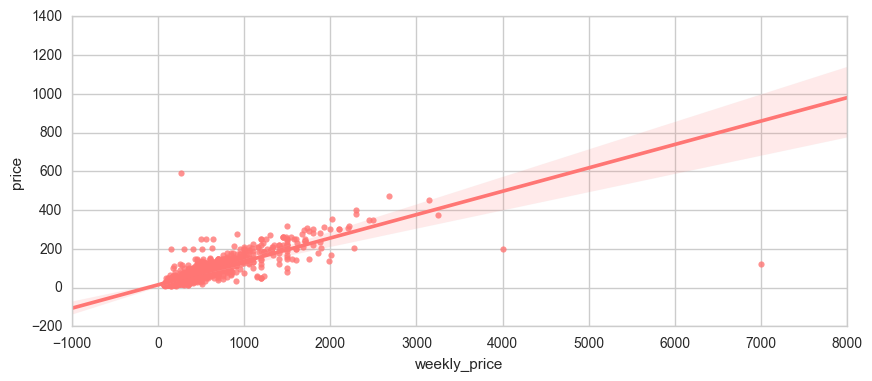

In [26]:
plt.figure(figsize=(10,4))
sns.regplot(x='weekly_price', y='price',data=listing, color = '#FF7674')

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Una frase que se debe recordar siempre:<br><br></span>
</div>
<div style="text-align: center;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 5em;">Correlación no Implica Causalidad</span><br><br>
</div>


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Data Visualization:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Vamos a graficar los coheficientes de correlación de cada *feature* con respecto a "Price". Empezamos seleccionando las columnas y creando una lista de coheficientes de correlación, llamada "correlations".</span>
</div>

In [27]:
# Creamos una función para graficar un dataframe con columnas string y valores numéricos.

def plot_dataframe(df, y_label):  
    color='#FF7674'
    fig = plt.gcf()
    fig.set_size_inches(18, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75) 
    plt.show()

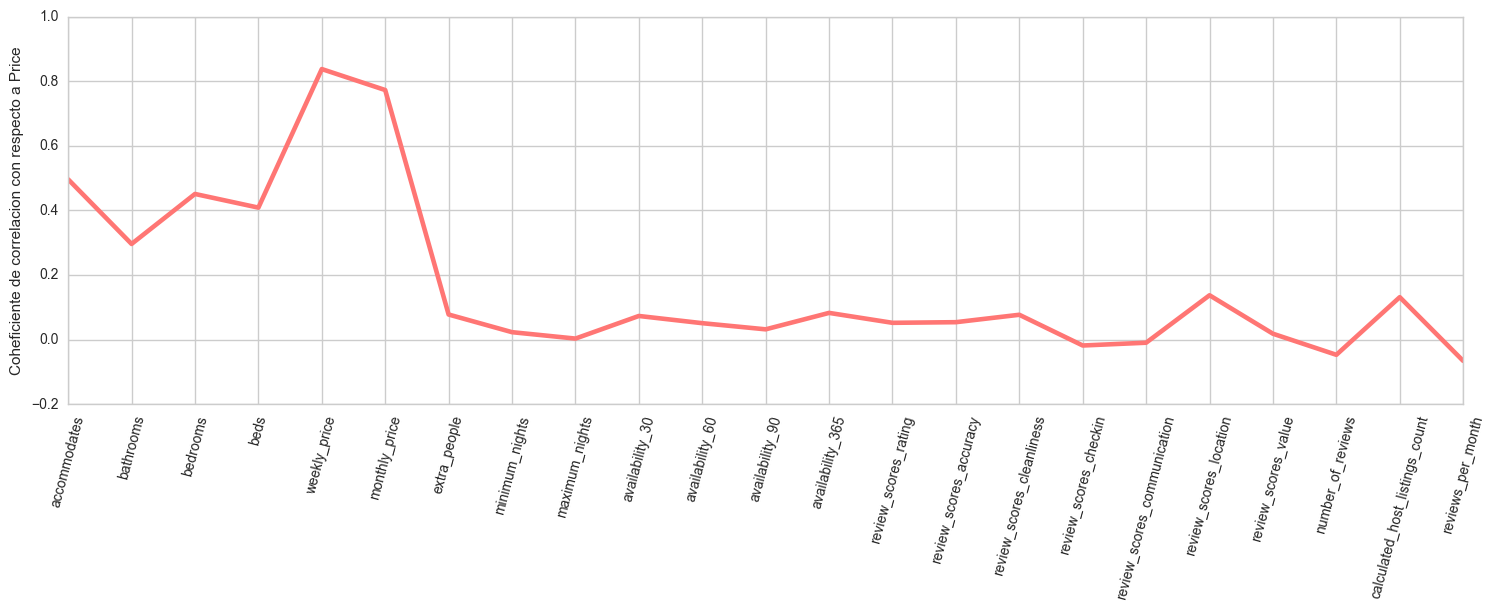

In [28]:
# Graficamos usando la función creada.
plt.figure(figsize=(10,4))
plot_dataframe(df2, 'Coheficiente de correlacion con respecto a Price')

In [29]:
# Obtenemos algunas estadísticas para variables numéricas de la tabla "listing"
features = listing[['accommodates','bathrooms', 'bedrooms','beds','weekly_price','monthly_price','review_scores_rating',
                    'number_of_reviews','calculated_host_listings_count','reviews_per_month']]


features.describe().transpose()

C:\Users\ronny\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
accommodates,13281.0,3.179429,1.980922,1.00,2.0,2.0,4.0,16.00
bathrooms,13233.0,1.250586,0.595768,0.00,NaN,NaN,NaN,8.00
bedrooms,13258.0,1.291975,0.822973,0.00,NaN,NaN,NaN,10.00
beds,13233.0,1.979521,1.506672,1.00,NaN,NaN,NaN,16.00
weekly_price,3495.0,414.288126,321.247943,70.00,NaN,NaN,NaN,7000.00
monthly_price,3309.0,1343.058326,983.013246,250.00,NaN,NaN,NaN,25000.00
review_scores_rating,10381.0,91.606011,8.991939,20.00,NaN,NaN,NaN,100.00
number_of_reviews,13281.0,22.950004,38.316181,0.00,1.0,7.0,27.0,446.00
calculated_host_listings_count,13281.0,7.620887,19.646937,1.00,1.0,2.0,4.0,145.00
reviews_per_month,10506.0,1.920654,1.886208,0.02,NaN,NaN,NaN,17.21


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Uno puede ver que la media de reservas en Airbnb es probablemente un apartamento, con a 3-4 personas en 1 o 2 dormitorios.</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Distribución de pisos por zonas:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Ahora haremos algunas gráficas para entender como es la distribución de distintos factores presente en los datos, para conocer diferencia entre zonas de Madrid.<br><br>Cantidad de pisos por barrios.</span>
</div>

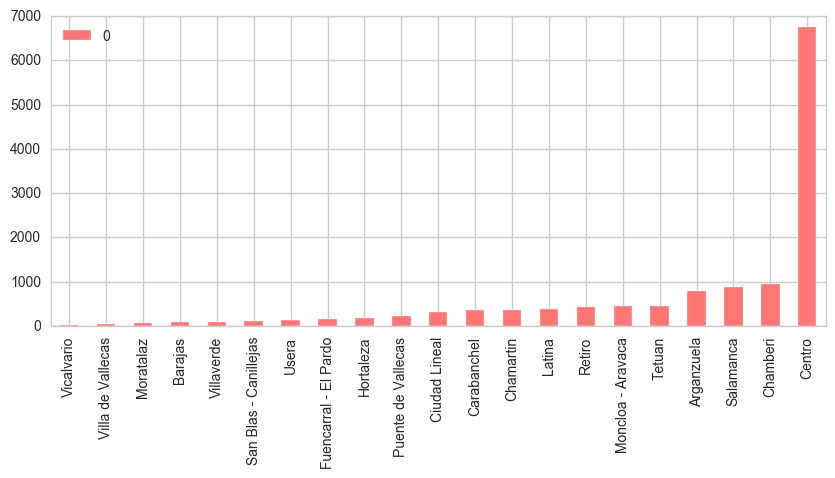

In [30]:
plt.figure(figsize=(10,4))
nb_counts = Counter(listing.neighbourhood_group_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar', color='#FF7674', figsize=(10, 4))

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Usaremos CARTO para graficar nuestros mapas geolocalizados. www.carto.com<br>
</span>
</div>

In [31]:
widgets.HTML(
    value='<iframe width="100%" height="520" frameborder="0" src="https://ronnydeabreu.carto.com/builder/92c6ad1d-36c6-4a02-b94c-b4400456137e/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>',
    disabled=False
)

<img src="./carto1.png">
<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Mapa interactivo en: https://ronnydeabreu.carto.com/builder/92c6ad1d-36c6-4a02-b94c-b4400456137e/embed</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Podemos observar en el mapa que la mayor concentración de pisos están en pleno Centro de Madrid, principalmente en los barrios de Chueca, Malasaña y Lavapies<br>
</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Ubicación de pisos según rango de precios.</span>
</div>

In [32]:
widgets.HTML(
    value='<iframe width="100%" height="520" frameborder="0" src="https://ronnydeabreu.carto.com/builder/49ba2036-49f1-40b4-8051-6f6668fb6a8d/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>',
    disabled=False
)

<img src="./carto2.png">
<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Mapa interactivo en: https://ronnydeabreu.carto.com/builder/49ba2036-49f1-40b4-8051-6f6668fb6a8d/embed</span>
</div>
<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
En el gráfico anterior se evidencia cómo los pisos de rango medio a nivel de precios de concentran en la zona centro de Madrid y además una pequeña concentración en la zona del Barrio de Salamanca. Las propiedades más costosas se encuentran en en su mayoría en la zona norte de Madrid, mientras que en toda la ciudad se pueden conseguir pisos económicos.</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Barrios más costosos: <br>
    O mejor planteado: Barrios con la media de precios más alta:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Determinemos cuáles son los barrios más costosos de la capital:</span>
</div>

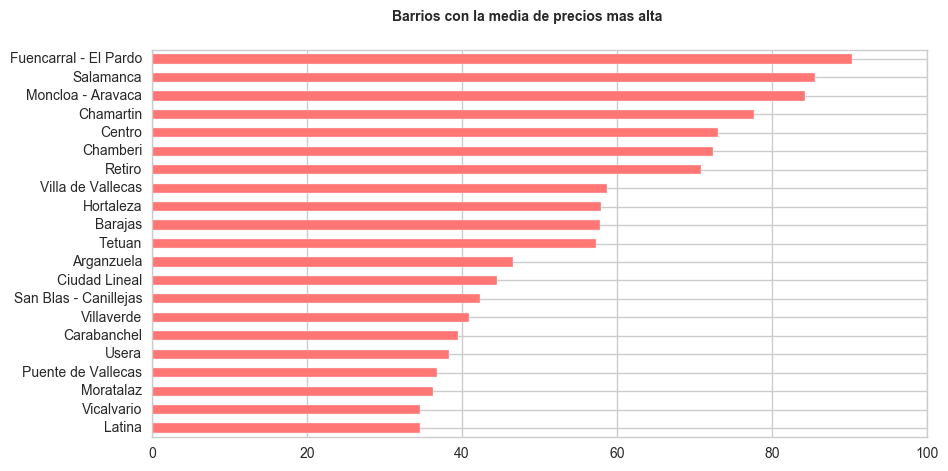

In [33]:
area2 = listing.groupby('neighbourhood_group_cleansed')
nb_price = area2['price'].agg([np.sum, np.mean, np.std]).sort_values(['mean'])

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Barrios con la media de precios mas alta', fontsize=10, fontweight='bold')
nb_price['mean'].plot(kind='barh', ax=ax, color='#FF7674')
plt.ylabel('')

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">HeatMap de precios según número de dormitorios.</span>
</div>

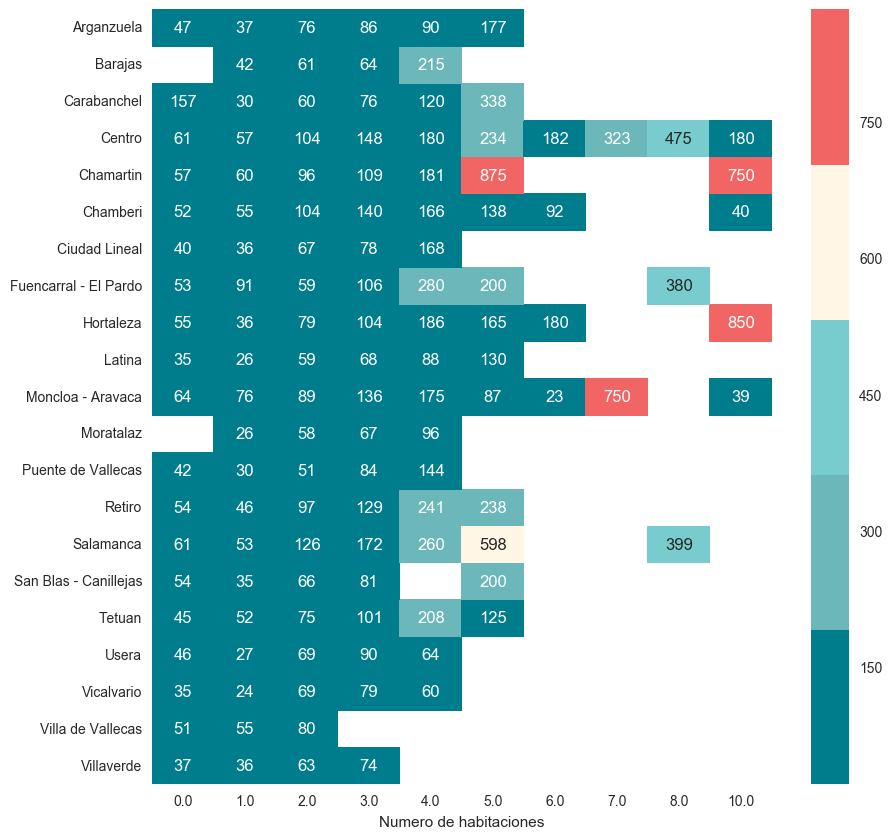

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(listing.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap=my_cmap)
plt.ylabel('')
plt.xlabel('Numero de habitaciones')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Podemos decir que existe un patrón de que entre más habitaciones y la ubicación del piso en alquiler, este puede ser más costoso.</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Relación entre el precio y demás "features" o características de los pisos.</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Veremos de forma visual, cuáles son las caráterísticas presentes en los pisos de alquiler en Madrid y cómo están reflejados en el precio de alquiler en AirBnB</span>
</div>

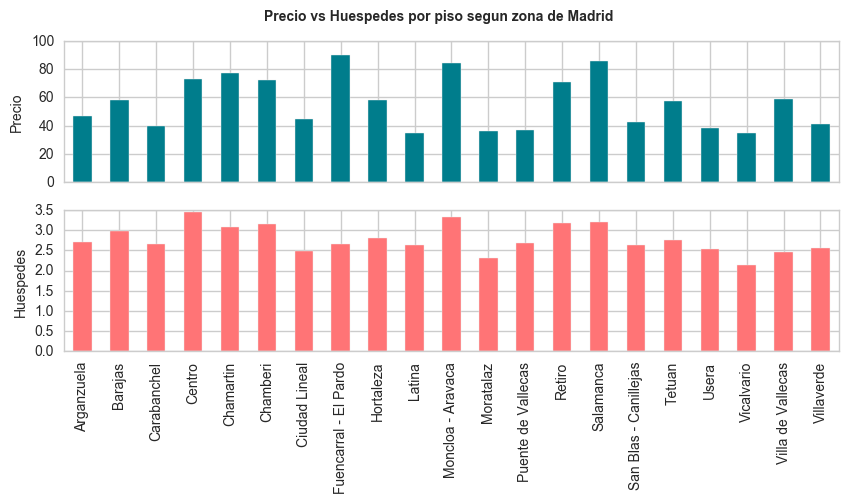

In [35]:
area = listing.groupby('neighbourhood_group_cleansed')
price = area['price'].agg([np.sum, np.mean, np.std])
accommodates = area['accommodates'].agg([np.sum, np.mean, np.std])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 4))
fig.suptitle('Precio vs Huespedes por piso segun zona de Madrid', fontsize=10, fontweight='bold')
price['mean'].plot(kind='bar', ax=ax[0], color='#007D8C')
accommodates['mean'].plot(kind='bar', ax=ax[1], color = '#FF7476')

ax[0].set_ylabel('Precio', fontsize=10)
ax[1].set_ylabel('Huespedes', fontsize=10)
plt.xlabel('')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

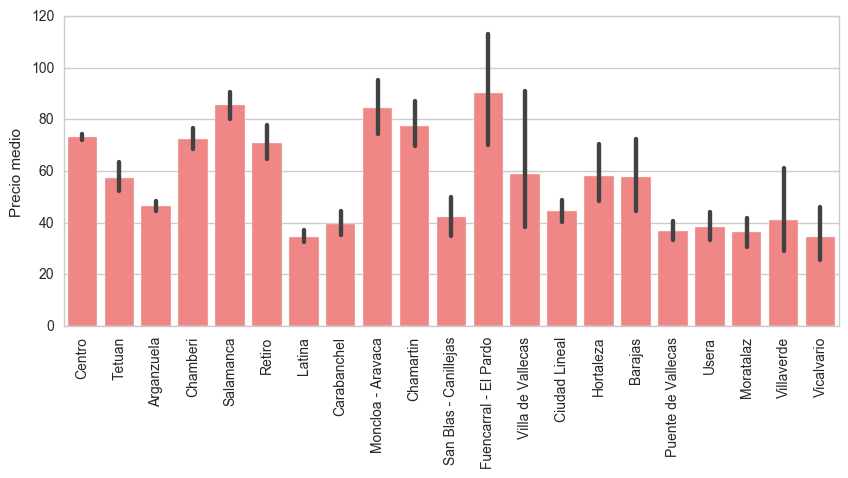

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(y='price',x='neighbourhood_group_cleansed',data=listing, color = '#FF7674')
plt.ylabel('Precio medio')
plt.xlabel('')
plt.xticks(rotation=90)


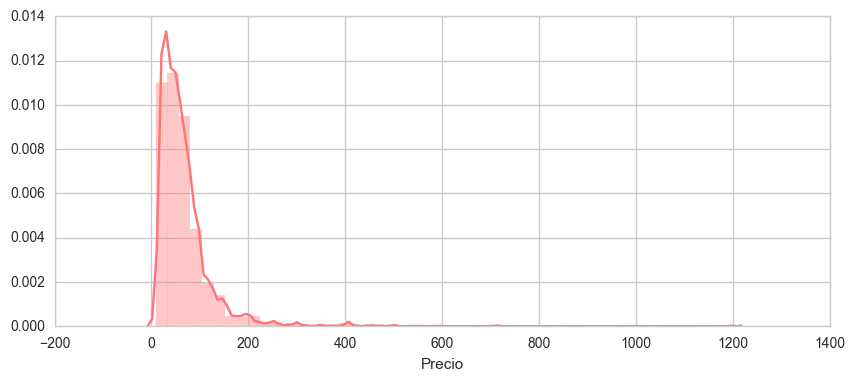

In [37]:
plt.figure(figsize=(10,4))
sns.distplot(listing['price'], color = '#FF7476')
plt.xlabel('Precio')
plt.show()

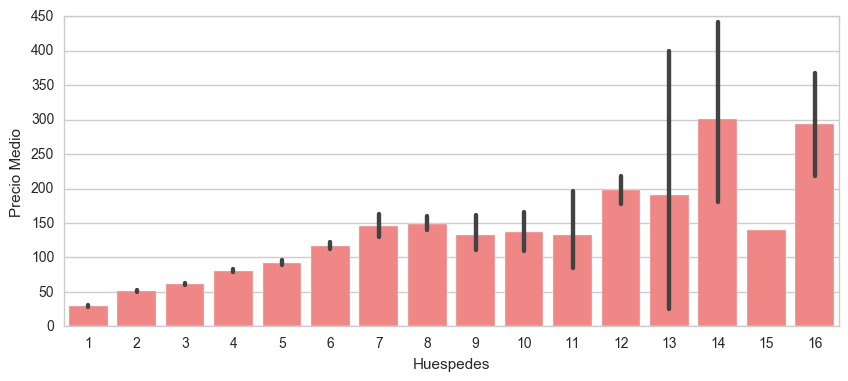

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(y='price',x='accommodates',data=listing, color = '#FF7674')
plt.ylabel('Precio Medio')
plt.xlabel('Huespedes')

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Diagramas para representar dispersión</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">En el siguiente conjunto de gráficas, mostraremos la dispersión de los pisos por barrios y según sus precios de alquiler. Estas gráficas nos permiten entender de forma visual, cómo se reparten los pisos de AirBnB en la ciudad de Madrid.</span>
</div>

[<matplotlib.text.Text at 0x200ada90>, <matplotlib.text.Text at 0x1ff23da0>]

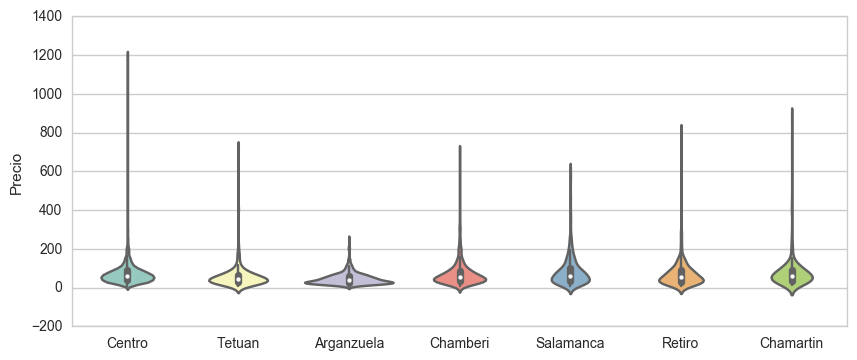

In [39]:
plt.figure(figsize=(10,4))

first = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') ]

a=sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=first, palette="Set3")
a.set(xlabel='', ylabel='Precio')


[<matplotlib.text.Text at 0x203e7eb8>, <matplotlib.text.Text at 0x203dab70>]

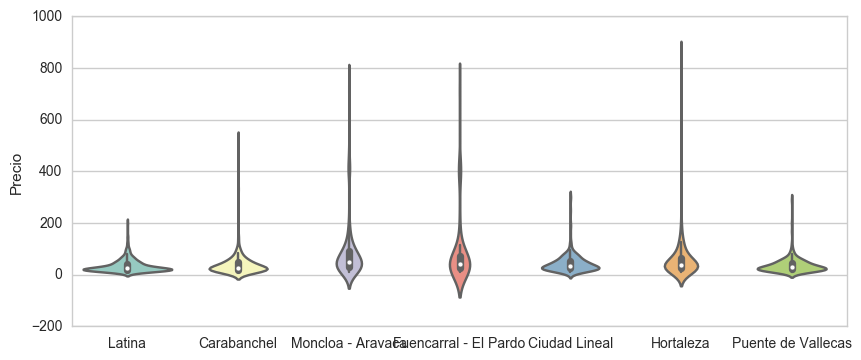

In [40]:
plt.figure(figsize=(10,4))

second = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
                     (listing['neighbourhood_group_cleansed'] == 'Latina') |
                     (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
                     (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
                     (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
                     (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')]

b=sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=second, palette="Set3")
b.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x20711c50>, <matplotlib.text.Text at 0x20706898>]

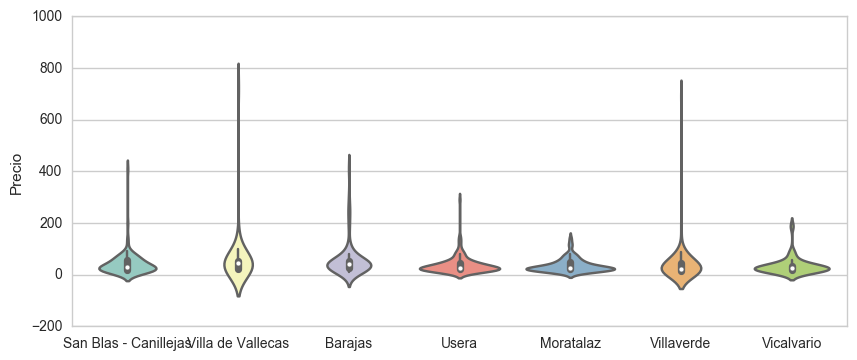

In [41]:
plt.figure(figsize=(10,4))

third = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Usera') |
                     (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
                     (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
                     (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
                     (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
                     (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]

c = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=third, palette="Set3")
c.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x2096aa90>, <matplotlib.text.Text at 0x209584e0>]

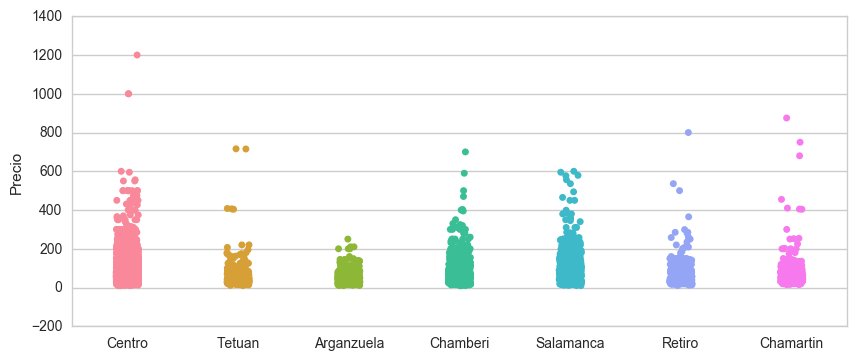

In [42]:
plt.figure(figsize=(10,4))
a = sns.stripplot(data=first,y='price',x='neighbourhood_group_cleansed',jitter=True)
a.set(xlabel='', ylabel='Precio')


[<matplotlib.text.Text at 0x20bd5a90>, <matplotlib.text.Text at 0x2096a6d8>]

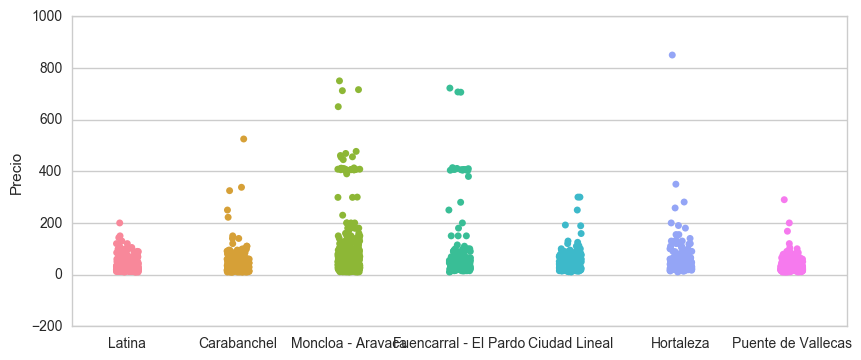

In [43]:
plt.figure(figsize=(10,4))
b = sns.stripplot(data=second,y='price',x='neighbourhood_group_cleansed',jitter=True)
b.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x20d637f0>, <matplotlib.text.Text at 0x204e7550>]

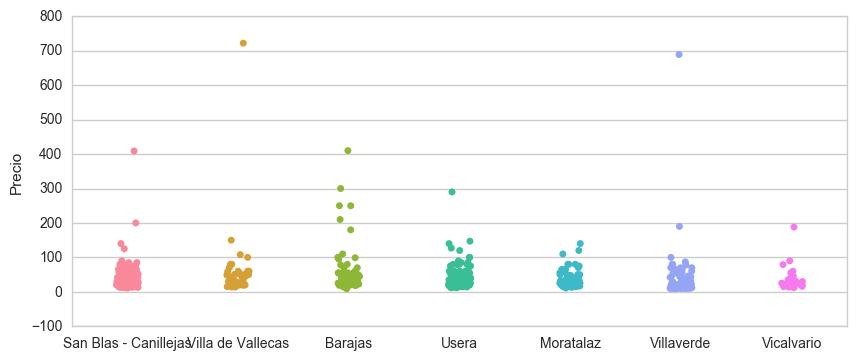

In [44]:
plt.figure(figsize=(10,4))
c = sns.stripplot(data=third,y='price',x='neighbourhood_group_cleansed',jitter=True)
c.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x20f58320>, <matplotlib.text.Text at 0x20f5e320>]

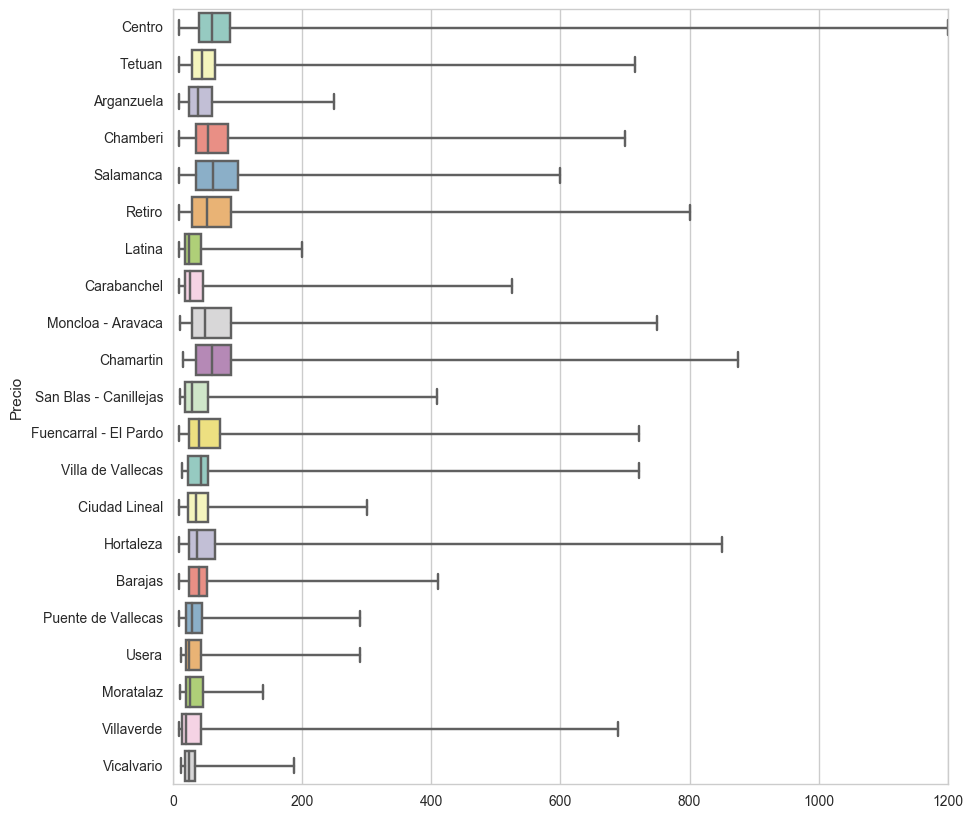

In [45]:
plt.figure(figsize=(10,10))

todos = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') |
           (listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
            (listing['neighbourhood_group_cleansed'] == 'Latina') |
            (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
            (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
            (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
            (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')|
            (listing['neighbourhood_group_cleansed'] == 'Usera') |
            (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
            (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
            (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
            (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
            (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]

a = sns.boxplot(x="price", y="neighbourhood_group_cleansed", data=todos, whis=np.inf, palette="Set3")

a.set(xlabel='', ylabel='Precio')


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Distribución del precio</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Por varias razones, es una práctica frecuente normalizar el precio en logaritmos con el objetivo de crear una distribución normal, que es más beneficioso para el modelado predictivo. </span>
</div>

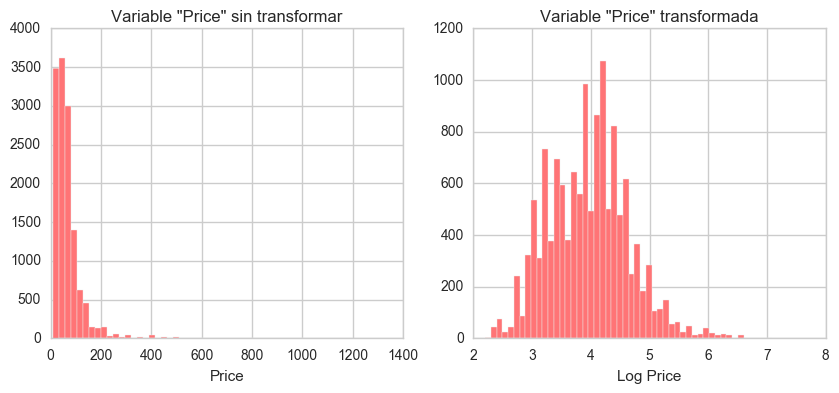

In [46]:
listing['price_log'] = np.log(listing['price'])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(listing['price'],bins=50, color = '#FF7476')
ax[0].set_title('Variable "Price" sin transformar')
ax[0].set_xlabel('Price')

ax[1].hist(listing['price_log'],bins=50, color = '#FF7476')
ax[1].set_title('Variable "Price" transformada')
ax[1].set_xlabel('Log Price')

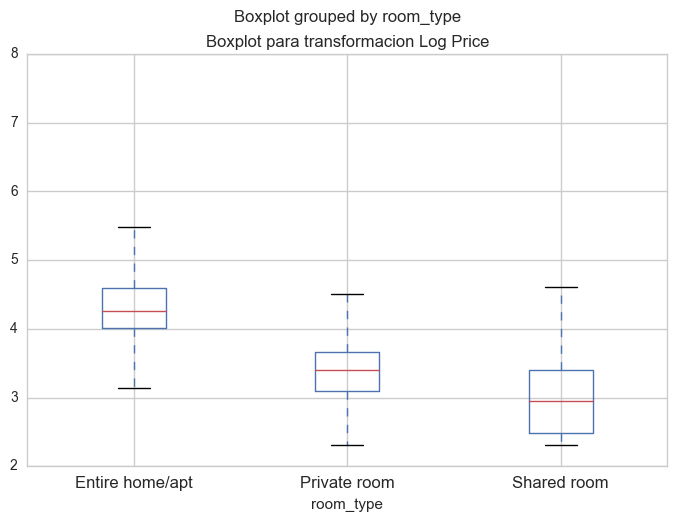

In [47]:
plt.figure(figsize=(10,10))
listing.boxplot(column='price_log', by ='room_type')
plt.title('Boxplot para transformacion Log Price')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Esta tranformación la usaremos en nuestro modelo predictivo.  </span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Agregando Data Adicional</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">La ciudad de Madrid es una capital que depende del transporte público para movilizar a una gran masa de gente diariamente. El Metro es quizás el método de transporte más usado, no sólo por locales sino por turistas en la ciudad. <br><br>Vamos a agregar información de la distancia entre los pisos de AirBnB a las estaciones de metro porque este podría influir como elemento predictor del precio de los pisos.</span>
</div>

In [48]:
metro = pd.read_csv('./bocas_metro_madrid.csv', delimiter = ',')
metro.head()

,estacion,lineas,salida,lon,lat
0,Plaza ElÃ­ptica,"6, 11","Avenida Oporto, pares",-3.718488,40.385293
1,Berna,ML 2,Berna,-3.791110,40.444716
2,Gregorio MaraÃ±Ã³n,"7, 10",Miguel Ãngel,-3.691382,40.437920
3,Concha Espina,9,Plaza de CataluÃ±a,-3.677684,40.449571
4,Parque Europa,12 (Metrosur),Francia,-3.806033,40.285176


In [49]:
metro.shape

(738, 5)

In [50]:
print 'Hay ' + str(len(metro['estacion'].unique())) + ' estaciones.'

Hay 276 estaciones.


In [51]:
# creates empty array to story longitude and latitude values of station entrances
avg_lat = np.zeros([len(metro['estacion'].unique()),])
avg_long = np.zeros([len(metro['estacion'].unique()),])

# iterates through each station and averages longitude and latitude coordinates
counter = 0
for item in metro['estacion'].unique():
        avg_lat[counter] = np.mean(metro['lat'].loc[metro['estacion'] == item])
        avg_long[counter] = np.mean(metro['lon'].loc[metro['estacion'] == item])
        counter += 1

In [52]:
# creates a pandas dataframe to store the average longitude and latitudes to one station location
ubicacion_metro = pd.DataFrame({'estacion': metro['estacion'].unique(),'lat': avg_lat, 'lon': avg_long})

In [ ]:
# creates an empty array to store the distance from the nearest subway for each listing
dist_metro = np.zeros([len(listing),])

index = 0
# iterates through each listing
for index, item in listing.iterrows():
    min_dist = 1000
    
    # checks each of the 356 stations for the closest station
    for counter, row in ubicacion_metro.iterrows():
        # measures distance on a Euclidean distance basis
        dist = np.sqrt((item['latitude'] - row['lat'])**2+(item['longitude'] - row['lon'])**2)
        # if the current distance is less than the stored minimum distance, than the current distance becomes the
        # min distance
        if dist < min_dist:
            dist_metro[index] = dist
            min_dist = dist
    index +=1

In [54]:
# exports transit location / distance information to a csv
exported_data = pd.DataFrame({'id': listing['id'].values, 'distancia_metro': dist_metro})
exported_data = exported_data[['id','distancia_metro']]

exported_data.tail()

,id,distancia_metro
13276,13487940,0.0
13277,14736623,0.0
13278,11447315,0.0
13279,13859359,0.0
13280,3046856,0.0


In [55]:
exported_data.to_csv('dist_metro.csv')

In [56]:
listing = pd.merge(listing, exported_data, on='id', how='outer')
listing.to_csv('./listing_clean.csv')